# Modifying Rates

Sometimes we want to change the nuclei involved in rates to simplify our network.  Currently,
pynucastro supports changing the products.  Here's an example.

In [1]:
import pynucastro as pyna

In [2]:
reaclib_library = pyna.ReacLibLibrary()

We want to model ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$ reactions.  There are 3 rates involved.

In [3]:
filter = pyna.RateFilter(reactants=["c12", "c12"])
mylib = reaclib_library.filter(filter)
mylib                       

c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
c12 + c12 --> p + na23         [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
c12 + c12 --> n + mg23         [Q =  -2.60 MeV] (c12 + c12 --> n + mg23 <cf88_reaclib__reverse>)

The rate ${}^{12}\mathrm{C}({}^{12}\mathrm{C},n){}^{23}\mathrm{Mg}$ is quickly followed by ${}^{23}\mathrm{Mg}(n,\gamma){}^{24}\mathrm{Mg}$, so we want to modify that rate sequence to just be ${}^{12}\mathrm{C}({}^{12}\mathrm{C},\gamma){}^{24}\mathrm{Mg}$

In [4]:
r = mylib.get_rate("c12 + c12 --> n + mg23 <cf88_reaclib__reverse>")
r

c12 + c12 --> n + mg23

This has the Q value:

In [5]:
r.Q

-2.598

Now we modify it

In [6]:
r.modify_products("mg24")
r

c12 + c12 --> mg24

and we see that the Q value has been updated to reflect the new endpoint

In [7]:
r.Q

13.93356

Now let's build a network that includes the nuclei involved in our carbon burning.  We'll start by leaving off the ${}^{23}\mathrm{Mg}$

In [8]:
mylib2 = reaclib_library.linking_nuclei(["p", "he4", "c12", "o16", "ne20", "na23", "mg24"])

Now we add in our modified rate

In [9]:
mylib2 += pyna.Library(rates=[r])

In [10]:
mylib2

he4 + he4 + he4 --> c12        [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
c12 + he4 --> o16              [Q =   7.16 MeV] (c12 + he4 --> o16 <nac2_reaclib__>)
c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
c12 + c12 --> p + na23         [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
o16 + he4 --> ne20             [Q =   4.73 MeV] (o16 + he4 --> ne20 <co10_reaclib__>)
o16 + c12 --> he4 + mg24       [Q =   6.77 MeV] (o16 + c12 --> he4 + mg24 <cf88_reaclib__>)
ne20 + he4 --> mg24            [Q =   9.32 MeV] (ne20 + he4 --> mg24 <il10_reaclib__>)
na23 + p --> he4 + ne20        [Q =   2.38 MeV] (na23 + p --> he4 + ne20 <il10_reaclib__>)
na23 + p --> mg24              [Q =  11.69 MeV] (na23 + p --> mg24 <il10_reaclib__>)
c12 + c12 --> mg24             [Q =  13.93 MeV] (c12 + c12 --> mg24 <cf88_reaclib__reverse>)
c12 --> he4 + he4 + he4        [Q =  -7.28 MeV] (c12 --> he4 + he4 + he4 <fy05_reaclib__reverse>)
o16 --> he

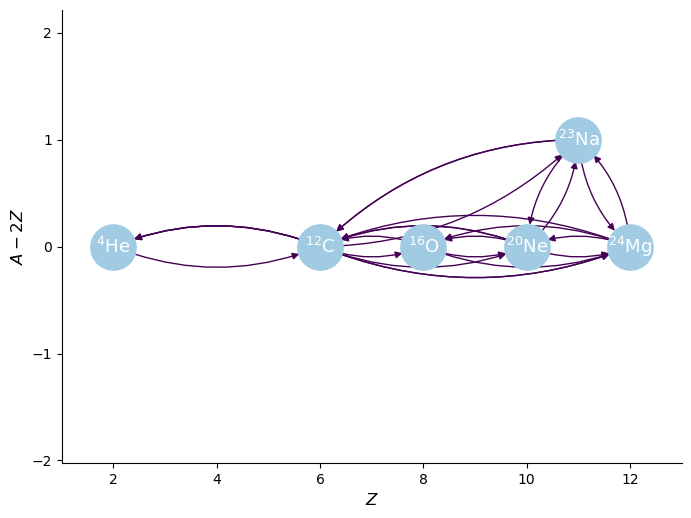

In [11]:
rc = pyna.RateCollection(libraries=[mylib2])
rc.plot(rotated=True, curved_edges=True, hide_xalpha=True)